# Problem 1

(a)
let $ A = \begin{vmatrix}a_{11} & a_{12} \\ a_{21} & a_{22} \end{vmatrix}, \, \mathbf{b} = \begin{vmatrix}b_1 \\ b_2 \end{vmatrix} $,  

$\quad f(\mathbf{x}) \triangleq
\frac{1}{2} \mathbf{x}^\top \mathbf{A} \mathbf{x} -
\mathbf{b}^\top\mathbf{x} = \frac{1}{2}(x_1, x_2) \begin{vmatrix}a_{11} & a_{12} \\ a_{21} & a_{22} \end{vmatrix} \begin{vmatrix}x_1 \\ x_2 \end{vmatrix} - \begin{vmatrix}b_1 \\ b_2 \end{vmatrix} (x_1, x_2)$ 
= $\frac{1}{2} (a_{11}x_1 + a_{21}x_2, a_{12}x_1 + a_{22}x_2) \begin{vmatrix}x_1 \\ x_2 \end{vmatrix} - (b_1x_1 + b_2x_2) $ 

= $\frac{1}{2} (a_{11}x_1^2 + a_{21}x_1x_2 + a_{12}x_1x_2 + a_{22}x_2^2) - (b_1x_1 + b_2x_2) $

$ \therefore a_{11} = 4, \,a_{22} = 6, \,a_{12} = a_{21} = -2, \,b_1 = 6, \,b_2 = 12$

$ A = \begin{vmatrix}4 & -2 \\ -2 & 6 \end{vmatrix}, \, \mathbf{b} = \begin{vmatrix}6 \\ 12 \end{vmatrix} $  

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
A = np.array([[4,-2],[-2,6]])
b = np.array([6,12])
epsilon = 0.01

def f(x):
    return 1/2 * x.T @ A @ x - b.T @ x

In [3]:
# (b.1) Constant step size
x1 = [np.array([0,0])]
t = 0.1
delta = [np.array([-(4 * x1[-1][0] - 2 * x1[-1][1] - 6), -(6 * x1[-1][1] - 2 * x1[-1][0] - 12)])]
k1 = 0
while np.linalg.norm(delta[-1]) >= epsilon:
    x1.append(x1[-1] + t * delta[-1])
    delta.append(np.array([-(4 * x1[-1][0] - 2 * x1[-1][1] - 6), -(6 * x1[-1][1] - 2 * x1[-1][0] - 12)]))
    k1 += 1
diff1 = [f(x)- f(x1[-1]) for x in x1]
print(x1[-1])

[2.99715115 2.99823931]


In [4]:
# (b.2) Exact line search
x2 = [np.array([0,0])]
s = np.arange(0.05,1.05,0.05)
delta = [np.array([-(4 * x2[-1][0] - 2 * x2[-1][1] - 6), -(6 * x2[-1][1] - 2 * x2[-1][0] - 12)])]

k2 = 0
while np.linalg.norm(delta[-1]) >= epsilon:  
    f_s = [f(x2[-1] + t * delta[-1]) for t in s]
    t = s[np.argmin(f_s)]
    x2.append(x2[-1] + t * delta[-1])
    delta.append(np.array([-(4 * x2[-1][0] - 2 * x2[-1][1] - 6), -(6 * x2[-1][1] - 2 * x2[-1][0] - 12)]))
    k2 += 1
diff2 = [f(x)- f(x2[-1]) for x in x2]
print(x2[-1])

[3.000375 2.998875]


In [5]:
# (b.3) Backtracking line search
x3 = [np.array([0,0])]
delta = [np.array([-(4 * x3[-1][0] - 2 * x3[-1][1] - 6), -(6 * x3[-1][1] - 2 * x3[-1][0] - 12)])]
alpha = 0.2
beta = 0.8
k3 = 0
while np.linalg.norm(delta[-1]) >= epsilon:  
    t = 1
    while  f(x3[-1] + t * delta[-1]) > f(x3[-1]) - alpha * t * delta[-1].T @ delta[-1]:
        t *= beta
    x3.append(x3[-1] + t * delta[-1])
    delta.append(np.array([-(4 * x3[-1][0] - 2 * x3[-1][1] - 6), -(6 * x3[-1][1] - 2 * x3[-1][0] - 12)]))
    k3 += 1
diff3 = [f(x)- f(x3[-1]) for x in x3]
print(x3[-1])

[3.00047705 2.99917447]


In [6]:
# (c) Newton's method
x4 = [np.array([0,0])]
t = 0.1
delta = [np.array([-(4 * x4[-1][0] - 2 * x4[-1][1] - 6), -(6 * x4[-1][1] - 2 * x4[-1][0] - 12)])]
delta_nt = [np.array([delta[-1][0] / 4, delta[-1][1] / 6])]
k4 = 0
while np.linalg.norm(delta_nt[-1]) >= epsilon:
    x4.append(x4[-1] + t * delta_nt[-1])
    delta.append(np.array([-(4 * x4[-1][0] - 2 * x4[-1][1] - 6), -(6 * x4[-1][1] - 2 * x4[-1][0] - 12)]))
    delta_nt.append(np.array([delta[-1][0] / 4, delta[-1][1] / 6]))
    k4 += 1
diff4 = [f(x)- f(x4[-1]) for x in x4]    
print(x4[-1])

[2.98703841 2.98941635]


In [7]:
# (d) Conjugate Gradient method
x5 = [np.array([0,0])]
p = [b - A @ x5[-1]]
r = [b - A @ x5[-1]]

t = [np.dot(r[-1],r[-1]) / np.dot(p[-1], A @ p[-1])]
x5.append(x5[-1] + t[-1] * p[-1])
r.append(r[-1] - t[-1] * A @ p[-1])
k5 = 1
while len(x5) < 2 or np.linalg.norm(r[-1]) >= epsilon:
    gama = [np.dot(r[-1],r[-1]) / np.dot(r[-2],r[-2])] 
    p.append(r[-1] + gama[-1] * p[-1])
    t = [np.dot(r[-1],r[-1]) / np.dot(p[-1], A @ p[-1])]
    x5.append(x5[-1] + t[-1] * p[-1])
    r.append(r[-1] - t[-1] * A @ p[-1])
    k5 += 1
diff5 = [f(x)- f(x5[-1]) for x in x5]      
print(x5[-1])

[3. 3.]


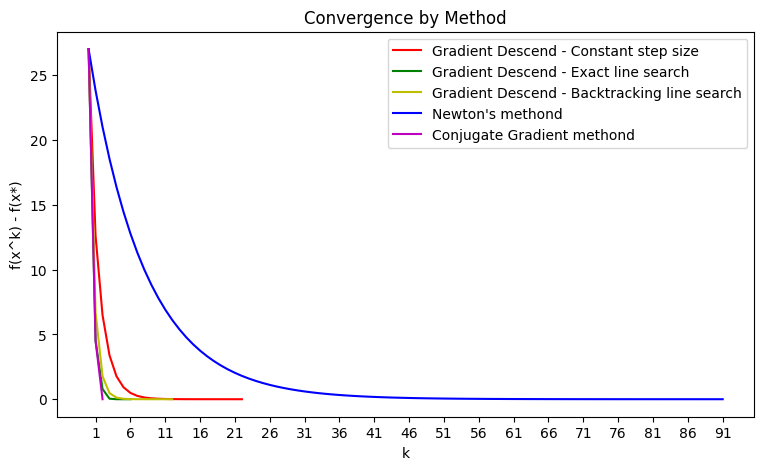

In [8]:
# (e) 
fig, ax = plt.subplots(figsize=(9, 5))
plt.plot(np.arange(k1+1),diff1, label = 'Gradient Descend - Constant step size', color = 'r')
plt.plot(np.arange(k2+1),diff2, label = 'Gradient Descend - Exact line search', color = 'g')
plt.plot(np.arange(k3+1),diff3, label = 'Gradient Descend - Backtracking line search', color = 'y')
plt.plot(np.arange(k4+1),diff4, label = 'Newton\'s methond', color = 'b')
plt.plot(np.arange(k5+1),diff5, label = 'Conjugate Gradient methond', color = 'm')
plt.xlabel('k')
plt.ylabel('f(x^k) - f(x*)')
plt.title('Convergence by Method')
plt.xticks(np.arange(1, max(k1,k2,k3,k4,k5)+1,5))
plt.legend()
plt.show()

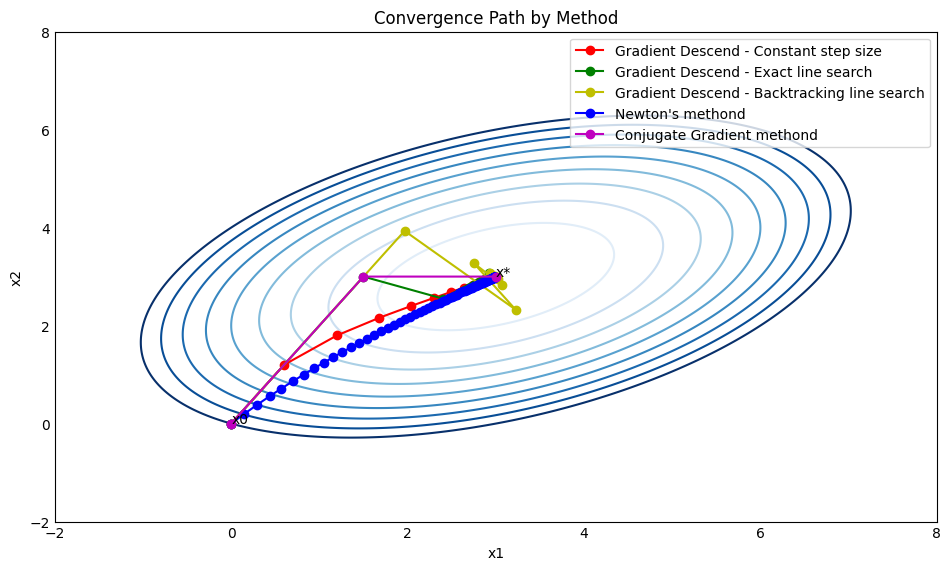

In [9]:
# (f)
plt.style.use('_mpl-gallery-nogrid')

# make data
X, Y = np.linspace(-2, 8, 256), np.linspace(-2, 8, 256)
Z = [[f(np.array([x,y])) for x in X] for y in Y]
levels = np.linspace(np.min(Z),0,10)

# plot
fig, ax = plt.subplots(figsize=(9, 5))
ax.contour(X, Y, Z, levels=levels)
plt.annotate("x*", xy=(3,3))
plt.annotate("x0", xy=(0,0))
#ax.plot(portfolio_volatility, portfolio_return)
ax.set_ylabel('x2')
ax.set_xlabel('x1')
plt.plot([x[0] for x in x1], [x[1] for x in x1], 'o-', label = 'Gradient Descend - Constant step size', color = 'r')
plt.plot([x[0] for x in x2], [x[1] for x in x2], 'o-', label = 'Gradient Descend - Exact line search', color = 'g')
plt.plot([x[0] for x in x3], [x[1] for x in x3], 'o-', label = 'Gradient Descend - Backtracking line search', color = 'y')
plt.plot([x[0] for x in x4], [x[1] for x in x4], 'o-', label = 'Newton\'s methond', color = 'b')
plt.plot([x[0] for x in x5], [x[1] for x in x5], 'o-', label = 'Conjugate Gradient methond', color = 'm')
plt.legend()
plt.title('Convergence Path by Method')
plt.plot()

plt.show()

#  Problem 2

In [10]:
import cvxpy as cp
import time
from autograd import grad

In [11]:
def g(x):
    return 1/2 * x.T @ sigma @ x - b.T @ np.log(x)

In [12]:
N = 3
b = np.ones(N) / N
sigma = np.array([[1.0, 0.02, -0.04], [0.02, 1.0, 0.02], [-0.04, 0.02,1.0]])
max_iter = 1000
epsilon = 0.0001

In [13]:
# calculate x_star by cvxpy
x = cp.Variable(N)
objective = cp.Minimize(1/2 * cp.quad_form(x, sigma) - b.T @ cp.log(x))
#constraint = [X >= 0]
prob = cp.Problem(objective, constraints = [x >= 0])
result = prob.solve()
x_star = x.value
print(x_star)
print(g(x_star))

[0.58339201 0.56580019 0.58339201]
1.0491026873269795


In [14]:
# (a)
x = [np.ones(N) / N]   
diff = [g(x[0]) - g(x_star)]
gamma = 0.8
start_time = time.perf_counter() 
time_used = [0]

# ∂g(x) / ∂x_i = Σ_i * x - b_i / x_i
# set Σ_i * x - b_i / x_i = 0 
# we have x_i = b_i / (Σ_i * x) 

for i in range(max_iter):
    x_new = b / (sigma @ x[-1])
    x_new_gamma = x[-1] - gamma * (x[-1] - x_new)
    x.append(x_new_gamma)
    diff.append(g(x[-1]) - g(x_star))
    time_used.append(time.perf_counter() - start_time)
    if np.linalg.norm(x[-2] - x[-1]) < epsilon:
        break
print(x[-1])
print(g(x[-1]))

[0.58341012 0.56581836 0.58341012]
1.0491026883530163


In [15]:
eigenvalues, _ = np.linalg.eig(sigma)
eigenvalues

array([0.94535898, 1.04      , 1.01464102])

2.(b)
for $\theta \mathbf{I} - \mathbf{\Sigma}$ to be positive semi-definite, we need all its eigenvalues to be non-negative. Eigenvalues of sigma $\lambda_i$ is (0.94535898, 1.04, 1.01464102) calculated as above, so we need to have $\theta - \lambda_i \ge 0, \therefore  \theta \ge max(\lambda_i) = 1.04$ 

Prove: we prove $u(\mathbf{x},\mathbf{y})$ satisfies the four construction rule of the majorizing function.

(A1) $u(\mathbf{y},\mathbf{y}) = g(\mathbf{y})$ for all feasible y.  Obviously this is true as the mid term of $u(\mathbf{y},\mathbf{y})$ is zero.

(A2) $u(\mathbf{x},\mathbf{y}) \ge g(\mathbf{y})$ for all feasible x, y.  When we choose $\theta$ such that $\theta \mathbf{I} - \mathbf{\Sigma}$ is positive semi-definite, the quadratic form $(\mathbf{x} - \mathbf{y})^\top (\theta \mathbf{I} - \mathbf{\Sigma})(\mathbf{x} - \mathbf{y}) \ge 0$, $\therefore \frac{1}{2}(\mathbf{x} - \mathbf{y})^\top (\theta \mathbf{I} - \mathbf{\Sigma})(\mathbf{x} - \mathbf{y}) \ge 0$, $\therefore u(\mathbf{x},\mathbf{y}) \ge g(\mathbf{y})$ 

(A3) $u^{\prime}(\mathbf{x},\mathbf{y};\mathbf{d})\lvert_{x = y} \,= g^{\prime}(\mathbf{y};\mathbf{d})$. When $\mathbf{x} = \mathbf{y}$ the mid term of $u(\mathbf{x},\mathbf{y})$ is zero, $u(\mathbf{y},\mathbf{y}) = g(\mathbf{y})$, $\therefore u^{\prime}(\mathbf{x},\mathbf{y};\mathbf{d})\lvert_{x = y} \,= g^{\prime}(\mathbf{y};\mathbf{d})$. 

(A4) $u(\mathbf{x},\mathbf{y})$ is continuous in x and y. All the terms in $u(\mathbf{x},\mathbf{y})$ is continuous in x and y,  $\therefore u(\mathbf{x},\mathbf{y})$ is continuous in x and y. 

$\therefore u(\mathbf{y},\mathbf{y})$ is a surrogate majorization function for $g(\mathbf{x})$. 



In [18]:
# （c）
x = [np.ones(N) / N]  
theta = 1.2
diff_MM = [g(x[0]) - g(x_star)]
gamma = 0.8
start_time = time.perf_counter() 
time_used_MM = [0]

# let temp = -x^k + 1 / theta * sigma @ x^k
# ∂u(x) / ∂x_i = theta * (x + temp[i]) - b_i / x_i
# set theta * (x + temp[i]) - b_i / x_i = 0 
# we have x_i = b_i / (theta * (x + temp[i]))

for i in range(max_iter):
    temp = -x[-1] + 1 / theta * sigma @ x[-1]
    x_new = b / (theta * (x[-1] + temp))
    x_new_gamma = x[-1] - gamma * (x[-1] - x_new)
    x.append(x_new_gamma)
    diff_MM.append(g(x[-1]) - g(x_star))
    time_used_MM.append(time.perf_counter() - start_time)
    if np.linalg.norm(x[-2] - x[-1]) < epsilon:
        break
print(x[-1])
print(g(x[-1]))

[0.58341012 0.56581836 0.58341012]
1.0491026883530163


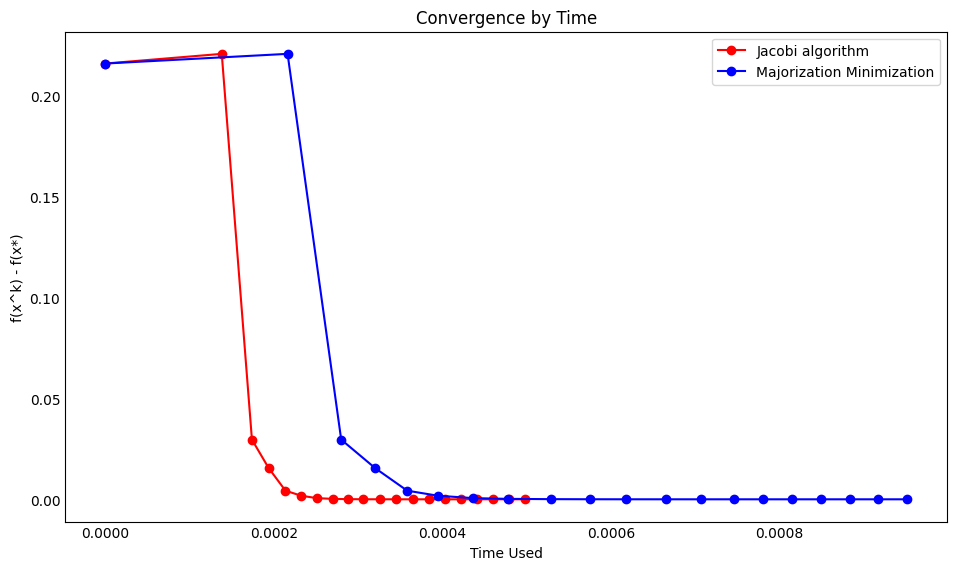

In [17]:
# (d)
fig, ax = plt.subplots(figsize=(9, 5))
plt.plot(time_used,diff,'o-',label = 'Jacobi algorithm', color = 'r')
plt.plot(time_used_MM,diff_MM,'o-',label = 'Majorization Minimization', color = 'b')
plt.xlabel('Time Used')
plt.ylabel('f(x^k) - f(x*)')
plt.title('Convergence by Time')
# plt.xticks(np.arange(1, max(k1,k2,k3,k4,k5)+1,5))
plt.legend()
plt.show()